In [2]:
import TurbPy as tb
from TurbPy.imports import *

In [3]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck
data = dirs + 'data/'
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

In [4]:
# from TurbPy.load_vars import *

# jrms_t = np.array([])
# jx2_av = np.array([])
# jy2_av = np.array([])
# jz2_av = np.array([])
# drhoe_t = np.array([])
# drhoi_t = np.array([])
# drho_t = np.array([])
# db_t = np.array([])
# ome_t = np.array([])
# omi_t = np.array([])
# omz2e_av = np.array([])
# omz2i_av = np.array([])
# for t in np.arange(len(times)):
#   dse = tb.load_hydro_fil(dirs, times[t], species = 'electron')
#   dsi = tb.load_hydro_fil(dirs, times[t], species = 'ion')
#   f = tb.load_field_fil(dirs, times[t])
#   jx = (dse['jx'] + dsi['jx'])
#   jy = (dse['jy'] + dsi['jy'])
#   jz = (dse['jz'] + dsi['jz'])
#   jrms_t = np.append(jrms_t, np.sqrt(np.average(jx**2 + jy**2 + jz**2)))
#   jx2_av = np.append(jx2_av, np.average(jx**2))
#   jy2_av = np.append(jy2_av, np.average(jy**2))
#   jz2_av = np.append(jz2_av, np.average(jz**2))
#   drhoe_t = np.append(drhoe_t, np.sqrt(np.average((dse['rho'])**2)))
#   drhoi_t = np.append(drhoi_t, np.sqrt(np.average((dsi['rho'])**2)))
#   db_t = np.append(db_t, 
#                     np.sqrt(np.average((f['cbx'])**2)+
#                     np.average((f['cby'])**2) +
#                     np.average((f['cbz'])**2)))
#   ome = tb.pcurl(dse['jx']/dse['rho'],
#                 dse['jy']/dse['rho'], 
#                 dse['jz']/dse['rho'], 
#                 dx = info['dx/de'], 
#                 dy = info['dy/de'], 
#                 dz = info['dz/de'])
#   omi = tb.pcurl(dsi['jx']/dsi['rho'],
#                 dsi['jy']/dsi['rho'], 
#                 dse['jz']/dsi['rho'], 
#                 dx = info['dx/de'], 
#                 dy = info['dy/de'], 
#                 dz = info['dz/de'])
#   ome_t = np.append(ome_t, np.average(ome[0]**2 + ome[1]**2 + ome[2]**2))
#   omi_t = np.append(omi_t, np.average(omi[0]**2 + omi[1]**2 + omi[2]**2))
#   omz2e_av = np.append(omz2e_av, np.average(ome[2]**2))
#   omz2i_av = np.append(omz2i_av, np.average(omi[2]**2))

In [5]:
# print(len(jrms_t))

In [6]:
# df = pd.DataFrame({'jrms': jrms_t,
#                    'jx2' : jx2_av,
#                    'jy2' : jy2_av,
#                    'jz2' : jz2_av,
#                    'drhoi': drhoi_t,
#                    'drhoe': drhoe_t,
#                    'db': db_t,
#                    'ome': ome_t,
#                    'omi': omi_t,
#                    'omz2e': omz2e_av,
#                    'omz2i': omz2i_av})
# df.to_csv(dirs + 'data/' + 'globals.csv')

In [7]:
df = pd.read_csv(dirs + 'data/' + 'globals.csv')
df['jrms']

0       0.001937
1       0.001790
2       0.001848
3       0.001844
4       0.001849
          ...   
1120    0.017821
1121    0.017870
1122    0.017931
1123    0.017980
1124    0.018045
Name: jrms, Length: 1125, dtype: float64

In [8]:
# fig, axs = plt.subplots(4,1, figsize=(12, 10), sharex = True, layout='constrained')
# # axs[0].plot(twci, (jrms_t), marker = 'x',  label = r'$J_{rms}$')
# axs[0].plot(twci, df['jx2'],  label = r'$\langle J_{x}^2 \rangle$')
# axs[0].plot(twci, (jy2_av),  label = r'$\langle J_{y}^2 \rangle$')
# axs[0].plot(twci, (jz2_av),  label = r'$\langle J_{z}^2 \rangle$')

# axs[1].plot(twci, (drhoe_t - drhoe_t[0]),  label = r'$\delta \rho^e_{rms}$')
# axs[1].plot(twci, (drhoi_t - drhoi_t[0]),  label = r'$\delta \rho^i_{rms}$')
# # axs.plot(twci, (drhoe_t - drhoi_t) - (drhoe_t - drhoi_t)[0], marker = 'x' , label = r'$\delta \rho_{rms}$' )
# axs[2].plot(twci, db_t - db_t[0] , label = r'$\delta B_{rms}$')
# axs[3].plot(twci, omz2e_av, label = r'$\langle \omega_{ze}^2 \rangle$')
# axs[3].plot(twci, omz2i_av, label = r'$\langle \omega_{zi}^2 \rangle$')
# # axs[3].plot(twci, ome_t, marker = 'x', label = r'$\delta \omega^e_{ms}$')
# # axs[3].plot(twci, omi_t, marker = 'x', label = r'$\delta \omega^i_{ms}$')


# for ax in axs:
#   ax.axvline(50, color = 'red')
#   ax.axvline(70, color = 'green')
#   ax.axvline(90, color = 'purple')
#   ax.axvline(150, color = 'teal')
#   ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
#   ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
#   ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
#   ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
#   ax.legend(loc = 'upper left', fontsize = 12)
#   ax.xaxis.set_minor_locator(AutoMinorLocator())
#   ax.yaxis.set_minor_locator(AutoMinorLocator())
#   ax.tick_params(which='both', width=2, labelsize = 10, right = True, direction = 'in')
#   ax.tick_params(which='major', length=10, top = True, right =True)
#   ax.tick_params(which='minor', length=5 , top = True, right =True)
#   ax.grid()

# # fig.supylabel(, size = 15)
# fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 15)
# plt.savefig(figs + 'globals_fil.jpg', dpi = 400)

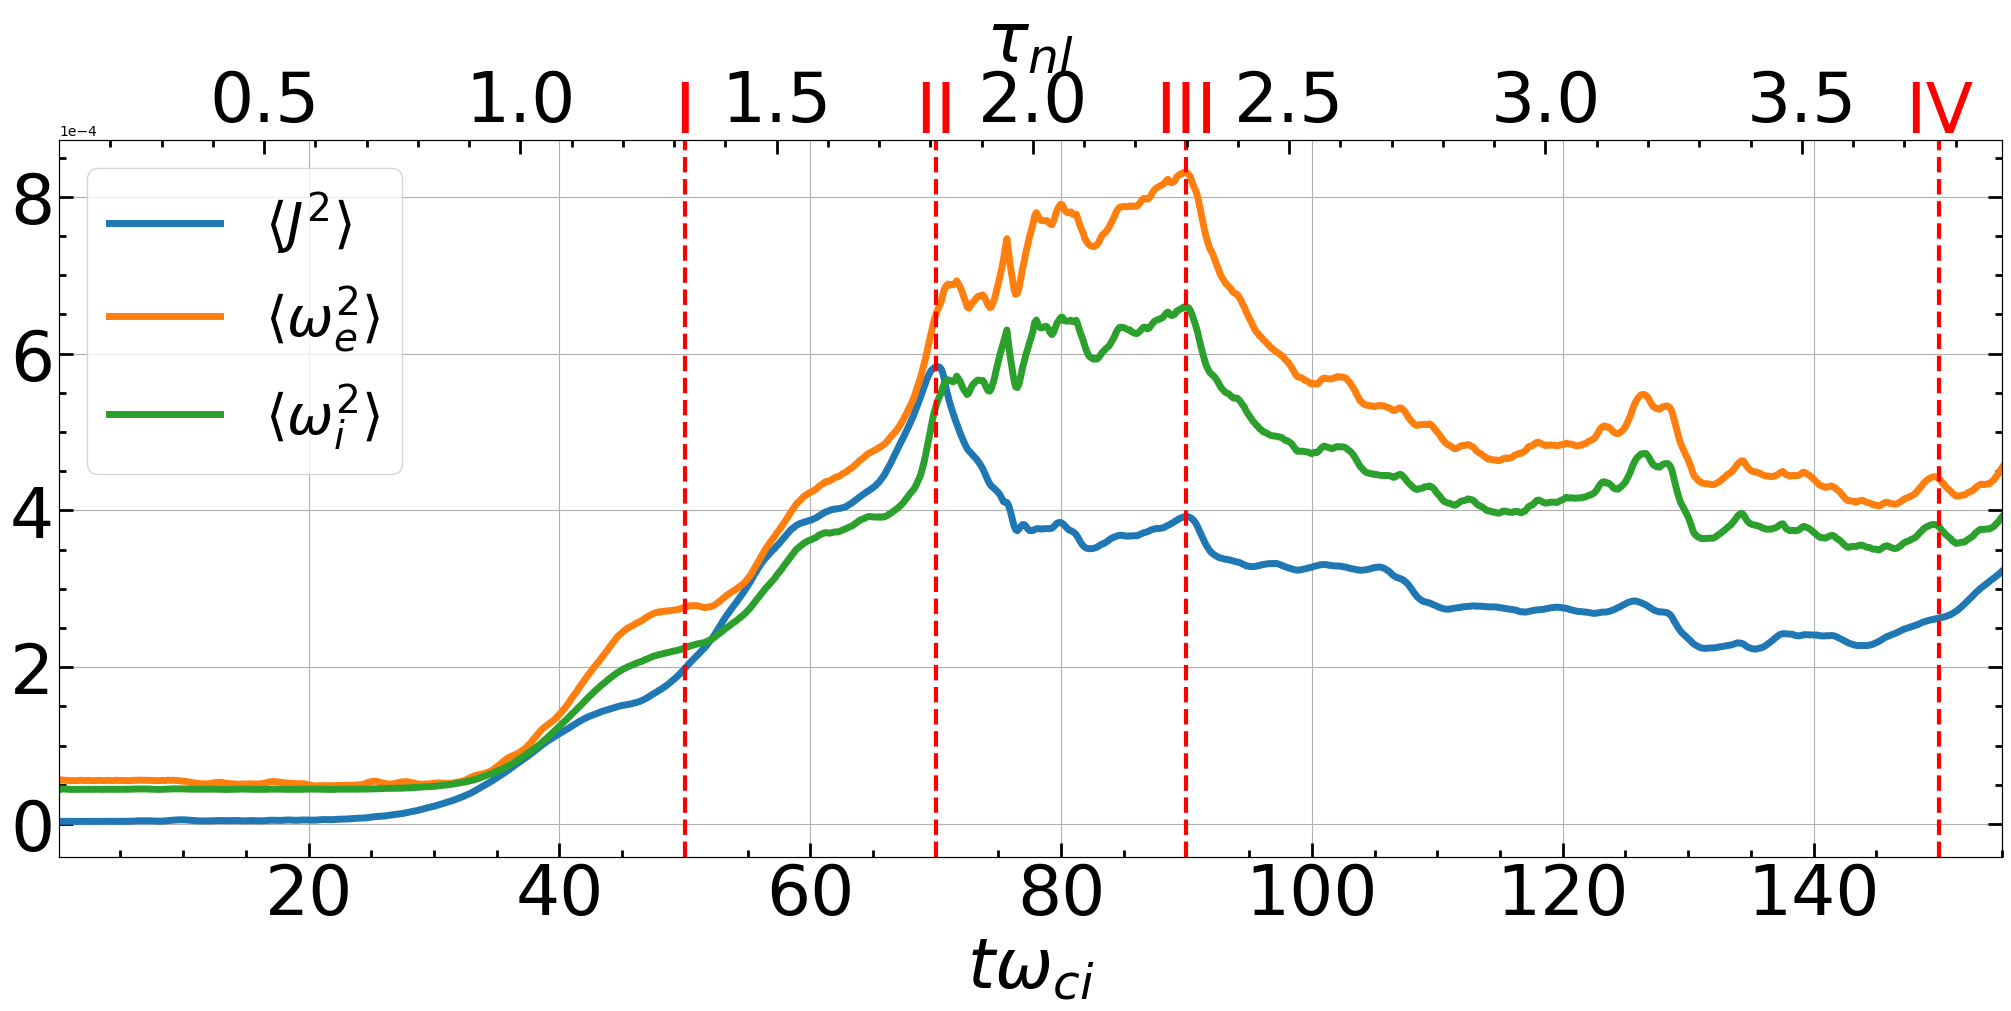

In [9]:
import matplotlib
fig, ax = plt.subplots(1,1, figsize=(20,10), layout='constrained')

# plt.rc('font', size=10)
# ax1.cla()
# axs[0].plot(twci, (jrms_t), marker = 'x',  label = r'$J_{rms}$')
ax.plot(twci, df['jrms']**2, linewidth = 5, label = r'$\langle J^2 \rangle$')
ax.plot(twci, df['ome'], linewidth = 5, label = r'$\langle \omega_e^2 \rangle$')
ax.plot(twci, df['omi'], linewidth = 5, label = r'$\langle \omega_i^2 \rangle$')

import matplotlib
matplotlib.rc('font', size=50)
# axs[1].plot(twci, (drhoe_t - drhoe_t[0]),  label = r'$\delta \rho^e_{rms}$')
# axs[1].plot(twci, (drhoi_t - drhoi_t[0]),  label = r'$\delta \rho^i_{rms}$')
# axs.plot(twci, (drhoe_t - drhoi_t) - (drhoe_t - drhoi_t)[0], marker = 'x' , label = r'$\delta \rho_{rms}$' )
# axs[2].plot(twci, db_t - db_t[0] , label = r'$\delta B_{rms}$')
# axs[3].plot(twci, omz2e_av, label = r'$\langle \omega_{ze}^2 \rangle$')
# axs[3].plot(twci, omz2i_av, label = r'$\langle \omega_{zi}^2 \rangle$')
# axs[3].plot(twci, ome_t, marker = 'x', label = r'$\delta \omega^e_{ms}$')
# axs[3].plot(twci, omi_t, marker = 'x', label = r'$\delta \omega^i_{ms}$')
# for ax in axs:
txt = 50
trans = ax.get_xaxis_transform()
ax.axvline(50, color = 'red', linestyle = '--', linewidth = 3)
plt.text(50, 1.01, 'I',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.axvline(70, color = 'red', linestyle = '--', linewidth = 3)
plt.text(70, 1.01, 'II',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.axvline(90, color = 'red', linestyle = '--', linewidth = 3)
plt.text(90, 1.01, 'III',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.axvline(150, color = 'red', linestyle = '--', linewidth = 3)
plt.text(150, 1.01, 'IV',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
ax.legend(loc = 'upper left', fontsize = 40)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2, labelsize = txt, right = True, direction = 'in')
ax.tick_params(which='major', length=10, top = True, right =True)
ax.tick_params(which='minor', length=5 , top = True, right =True)
ax.grid()


ax1 = ax.twiny()

ax1.plot(np.linspace(0,3.89, len(twci)), np.zeros(len(twci)), alpha = 0)
ax1.tick_params(axis ='x') 
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2, labelsize = txt, right = True, direction = 'in')
ax1.tick_params(which='major', length=10, top = True, right =True)
ax1.tick_params(which='minor', length=5 , top = True, right =True)
# fig.supylabel(, size = 15)
ax.set_xlim(0.1, 155)
ax1.set_xlim(0.1, 3.89)
ax1.set_xlabel(r'$ \tau_{nl}$', size = txt)
ax.set_xlabel(r'$ t \omega_{ci}$', size = txt)
plt.savefig(figs + 'globals.pdf', dpi = 400)

In [10]:
ps = pd.read_csv(data + 'PS_av.csv')

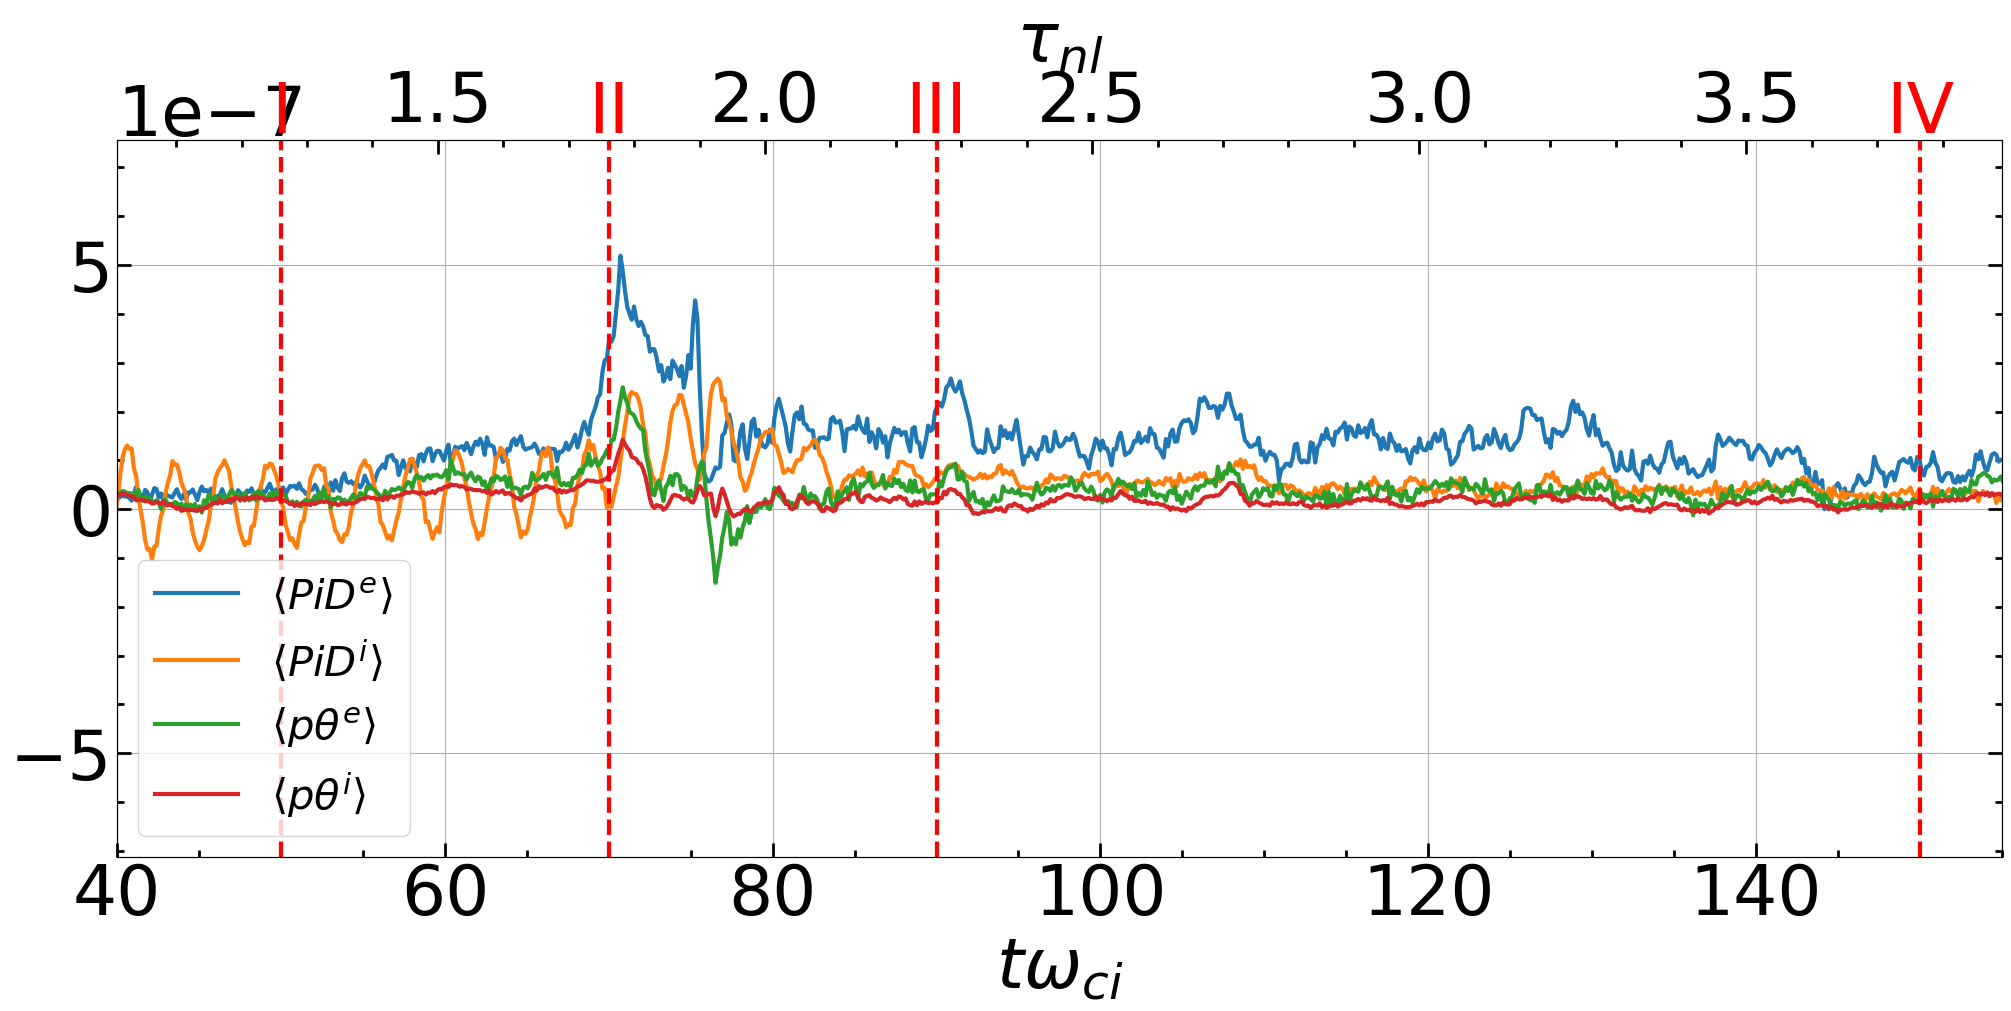

In [11]:
import matplotlib
fig, ax = plt.subplots(1,1, figsize=(20,10), layout='constrained')

# plt.rc('font', size=10)
# ax1.cla()
# axs[0].plot(twci, (jrms_t), marker = 'x',  label = r'$J_{rms}$')
ax.plot(twci, ps['pide'], linewidth = 3, label = r'$\langle PiD^e \rangle$')
ax.plot(twci, ps['pidi'], linewidth = 3, label = r'$\langle PiD^i \rangle$')
ax.plot(twci, ps['pthe'], linewidth = 3, label = r'$\langle p \theta^e \rangle$')
ax.plot(twci, ps['pthi'], linewidth = 3, label = r'$\langle p \theta^i \rangle$')
import matplotlib
matplotlib.rc('font', size=30)
# axs[1].plot(twci, (drhoe_t - drhoe_t[0]),  label = r'$\delta \rho^e_{rms}$')
# axs[1].plot(twci, (drhoi_t - drhoi_t[0]),  label = r'$\delta \rho^i_{rms}$')
# axs.plot(twci, (drhoe_t - drhoi_t) - (drhoe_t - drhoi_t)[0], marker = 'x' , label = r'$\delta \rho_{rms}$' )
# axs[2].plot(twci, db_t - db_t[0] , label = r'$\delta B_{rms}$')
# axs[3].plot(twci, omz2e_av, label = r'$\langle \omega_{ze}^2 \rangle$')
# axs[3].plot(twci, omz2i_av, label = r'$\langle \omega_{zi}^2 \rangle$')
# axs[3].plot(twci, ome_t, marker = 'x', label = r'$\delta \omega^e_{ms}$')
# axs[3].plot(twci, omi_t, marker = 'x', label = r'$\delta \omega^i_{ms}$')
# for ax in axs:
txt = 50
trans = ax.get_xaxis_transform()
ax.axvline(50, color = 'red', linestyle = '--', linewidth = 3)

ax.axvline(70, color = 'red', linestyle = '--', linewidth = 3)
plt.text(50, 1.01, 'I',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(70, 1.01, 'II',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(90, 1.01, 'III',color = 'red', transform=trans, ha = 'center', fontsize = txt)
plt.text(150,1.01, 'IV',color = 'red', transform=trans, ha = 'center', fontsize = txt)
ax.axvline(90, color = 'red', linestyle = '--', linewidth = 3)

ax.axvline(150, color = 'red', linestyle = '--', linewidth = 3)

ax.ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
ax.legend(loc = 'lower left', fontsize = 30)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2, labelsize = txt, right = True, direction = 'in')
ax.tick_params(which='major', length=10, top = True, right =True)
ax.tick_params(which='minor', length=5 , top = True, right =True)
ax.grid()


ax1 = ax.twiny()

ax1.plot(np.linspace(0,3.89, len(twci)), np.zeros(len(twci)), alpha = 0)
ax1.tick_params(axis ='x') 
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2, labelsize = txt, right = True, direction = 'in')
ax1.tick_params(which='major', length=10, top = True, right =True)
ax1.tick_params(which='minor', length=5 , top = True, right =True)
# fig.supylabel(, size = 15)
ax.set_xlim(40, 155)
ax1.set_xlim(1.01, 3.89)
ax1.set_xlabel(r'$ \tau_{nl}$', size = txt)
ax.set_xlabel(r'$ t \omega_{ci}$', size = txt)
plt.savefig(figs + 'PS_av.pdf', dpi = 400)

In [12]:
tnl = np.linspace(0,3.89, len(twci))

In [13]:
print(twci[290])

40.05097200000001


In [14]:
print(tnl[290])

1.0036476868327402
